In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Cleaned Datasets

In [23]:
df1_filtered = pd.read_csv("asserts/df1_filtered.csv")
df1_filtered.head()

,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


In [24]:
df2_filtered = pd.read_csv("asserts/df2_filtered.csv")
df2_filtered.head()

,Date,State,County,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2021-04-30,WA,Thurston,0,0,0,56710
1,2017-10-31,WA,Adams,3,3,6,12283
2,2018-07-31,WA,Whatcom,2,0,2,42313
3,2019-08-31,WA,Grays Harbor,0,0,0,20570
4,2019-10-31,WA,Cowlitz,0,0,0,29023


In [25]:
# Filter the datasets for each state
df1_wa = df1_filtered[df1_filtered['State'] == 'WA']
df1_ca = df1_filtered[df1_filtered['State'] == 'CA']

df2_wa = df2_filtered[df2_filtered['State'] == 'WA']
df2_ca = df2_filtered[df2_filtered['State'] == 'CA']



### Insight: Adoption Rates and Geographic Distribution 



Big question:  How is EV adoption distributed across Washington and California, both geographically and by time?

To answer the big question, below are several helper questions.

Which county, among the top 15 counties by total EV adoption in WA/CA State, has experienced the most significant growth in electric vehicle (EV) adoption over time?

In [82]:
def analyze_county_ev_adoption(df_state, state_name):
    # Calculate Total EV Adoption per County
    total_ev_per_county = df_state.groupby('County')['EVTotal'].sum().reset_index()
    
    # Select Top 15 Counties
    top_counties = total_ev_per_county.sort_values(by='EVTotal', ascending=False).head(15)['County'].tolist()
    
    # Filter DataFrame to Include Only Top 15 Counties
    top15_df = df_state[df_state['County'].isin(top_counties)]
    
    # Extract Year and Calculate Annual Data
    top15_df['Year'] = pd.to_datetime(top15_df['Date']).dt.year
    annual_ev_total = top15_df.groupby(['County', 'Year'])['EVTotal'].sum().reset_index()
    annual_ev_total['GrowthRate'] = annual_ev_total.groupby('County')['EVTotal'].pct_change() * 100
    
    # Calculate Cumulative Growth Rate for Each County
    cumulative_growth = annual_ev_total.groupby('County')['GrowthRate'].prod().reset_index()
    cumulative_growth.columns = ['County', 'CumulativeGrowthRate']
    top_3_growth_counties = cumulative_growth.sort_values(by='CumulativeGrowthRate', ascending=False).head(3)
    
    for index, row in top_3_growth_counties.iterrows():
        print(f"County: {row['County']}, Cumulative Growth Rate: {row['CumulativeGrowthRate']}")
    
    # Plot the Graphs for Top 15 Counties
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))
    
    # Plotting Growth Rate
    sns.lineplot(data=annual_ev_total, x='Year', y='GrowthRate',
                 hue='County', marker='o', ax=axs[0], palette='tab10')
    axs[0].set_title(f'Annual Growth Rate of EV Adoption for Top 15 Counties in {state_name}')
    axs[0].set_ylabel('Growth Rate (%)')
    axs[0].get_legend().remove()
    
    # Plotting Absolute EV Counts
    sns.lineplot(data=annual_ev_total, x='Year', y='EVTotal', 
                 hue='County', marker='o', ax=axs[1], palette='tab20b')
    axs[1].set_title(f'Absolute EV Counts of EV Adoption for Top 15 Counties in {state_name}')
    axs[1].set_ylabel('EV Total Count')
    axs[1].get_legend().remove()
    
    # Creating a Single Legend
    lines, labels = axs[0].get_legend_handles_labels()
    fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.1, 0.6))
    
    plt.tight_layout()
    plt.show()
    
    return highest_growth_county




C:\Users\qfu88\AppData\Local\Temp\ipykernel_23452\404515898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df['Year'] = pd.to_datetime(top15_df['Date']).dt.year


County: King, Cumulative Growth Rate: -579918002.0262908
County: Kitsap, Cumulative Growth Rate: -686148401.3327417
County: Snohomish, Cumulative Growth Rate: -767205360.2542334


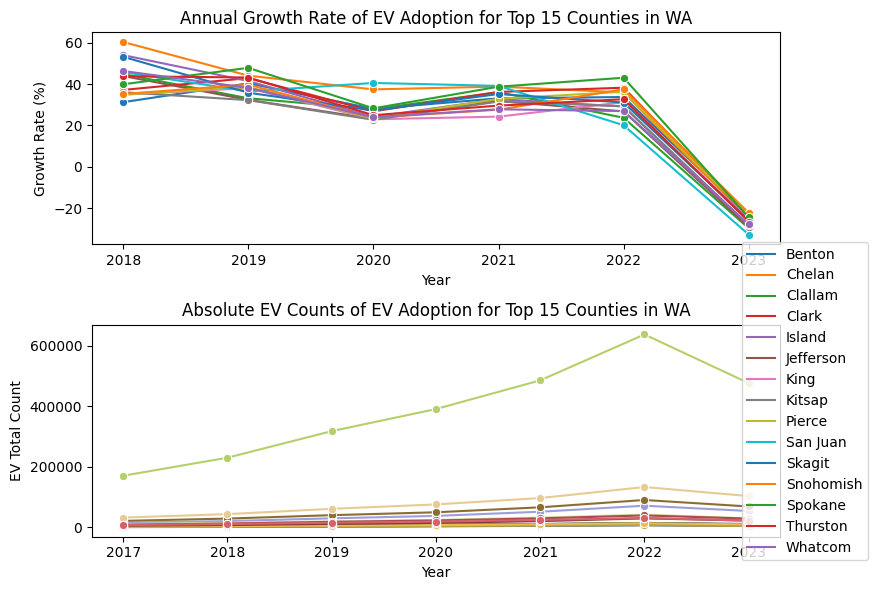

WA County                              King
CumulativeGrowthRate   -579918002.026291
Name: 6, dtype: object


In [83]:
# WA
highest_growth_county_wa = analyze_county_ev_adoption(df2_wa, 'WA')
print("WA", highest_growth_county_wa)


C:\Users\qfu88\AppData\Local\Temp\ipykernel_23452\404515898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df['Year'] = pd.to_datetime(top15_df['Date']).dt.year


County: Riverside, Cumulative Growth Rate: 387172843.83812827
County: Los Angeles, Cumulative Growth Rate: 170810322.67041743
County: Ventura, Cumulative Growth Rate: 141230541.70991832


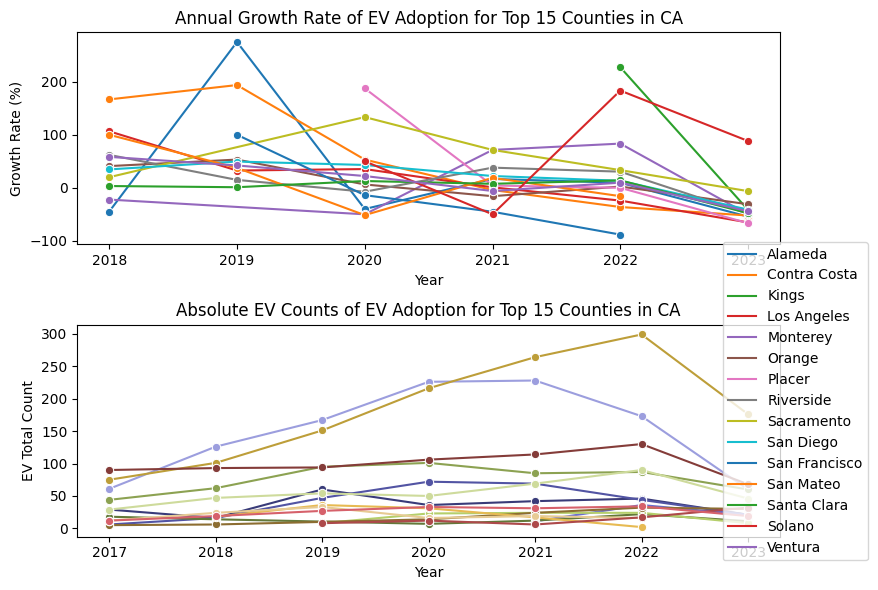

CA County                              King
CumulativeGrowthRate   -579918002.026291
Name: 6, dtype: object


In [84]:
# CA

highest_growth_county_ca = analyze_county_ev_adoption(df2_ca, 'CA')
print("CA", highest_growth_county_ca)

Which make and model of EV have been most significantly adopted in King and Riverside counties

In [85]:
counties_of_interest = ["King", "Riverside", "Kitsap","Los Angeles", "Snohomish", "Ventura"]
df_best_county = df1_filtered[df1_filtered['County'].isin(counties_of_interest)]

In [88]:
# Group by 'County', 'Make', and 'Model' and calculate the size of each group
make_model_count = df_best_county.groupby(['County', 'Make', 'Model']).size().reset_index(name='Count')

# Initialize a DataFrame to hold the results
most_adopted_ev = pd.DataFrame(columns=['County', 'Make', 'Model', 'Count'])

for county in counties_of_interest:
    county_df = make_model_count[make_model_count['County'] == county]
    
    most_adopted = county_df.sort_values(by='Count', ascending=False).head(1)
 
    most_adopted_ev = most_adopted_ev.append(most_adopted, ignore_index=True)

print(most_adopted_ev)



        County      Make     Model  Count
0         King     TESLA   MODEL 3  15251
1    Riverside     TESLA   MODEL 3      3
2       Kitsap     TESLA   MODEL 3    665
3  Los Angeles     TESLA   MODEL 3      2
4    Snohomish     TESLA   MODEL Y   3980
5      Ventura  CHRYSLER  PACIFICA      1


C:\Users\qfu88\AppData\Local\Temp\ipykernel_23452\335353672.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_adopted_ev = most_adopted_ev.append(most_adopted, ignore_index=True)


In [89]:
# Define the list of counties of interest
counties_of_interest = ["King", "Kitsap", "Snohomish"]

df2_filtered_counties = df2_filtered[df2_filtered['County'].isin(counties_of_interest)]

df2_grouped = df2_filtered_counties.groupby(['Date', 'County'])['EVTotal'].sum().reset_index()

df2_grouped['Year'] = pd.to_datetime(df2_grouped['Date']).dt.year


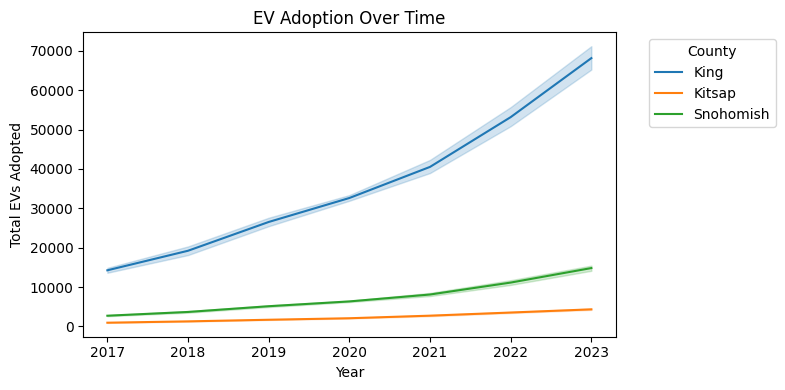

In [91]:

plt.figure(figsize=(8,4))
sns.lineplot(data=df2_grouped, x='Year', y='EVTotal', hue='County')
plt.title('EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Total EVs Adopted')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Datasets with All States

In [44]:
df_all = df2[['State', 'County', 'Date', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
                          'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].copy()

#Rename and Rearrange columns
df_all.rename(columns={
    'Electric Vehicle (EV) Total': 'EVTotal',
    'Non-Electric Vehicle Total': 'NonEVTotal',
    'Battery Electric Vehicles (BEVs)': 'BEVCount',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'PHEVCount'
}, inplace=True)


df_all = df_all[['Date', 'State', 'County', 'BEVCount', 'PHEVCount', 'EVTotal', 'NonEVTotal']]

df_all['Date'] = pd.to_datetime(df_all['Date'])

df_all.dropna(inplace=True)


In [52]:
df_all['Year'] = df_all['Date'].dt.year


df_all_yearly = df_all.groupby(['Year', 'State']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()


In [53]:
df_all_yearly.head()

,Year,State,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2017,AK,0,12,12,582
1,2017,AL,12,12,24,1194
2,2017,AZ,58,20,78,29064
3,2017,CA,264,148,412,89981
4,2017,CO,20,6,26,9623


## Insights two:

Insight 2: Popular Types of Electric Vehicles and their Attributes
Big Question: What types of electric vehicles are most popular, and what are their typical characteristics like price range, electric range, etc.?


To answer the big question, below are several helper questions.

### To Answer Question one:

Are there regional preferences for certain types of electric vehicles? For example, are BEVs more popular in urban areas, while PHEVs are preferred in rural areas?

In [71]:
#create two datasets(urban dataset and rural dataset)

urban_cities = ['Seattle', 'Bellevue', 'Redmond', 'Vancouver', 'San Francisco', 'Palo Alto', 'San Jose']
df_urban = df1_filtered[df1_filtered['City'].isin(urban_cities)]

rural_counties = ['Kern', 'Sonoma', 'Napa', 'Monterey', 'Santa Barbara', 'Okanogan', 'Stevens', 'Wahkiakum', 'Ferry', 'Pend Oreille', 'Columbia', 'Garfield']
df_rural = df1_filtered[df1_filtered['County'].isin(rural_counties)]



### For Shen: above two datasets used for question one

I sliced out some typical cities as urban area, and counties that can consider as rural area. 

To answer above question, we can just do some exploratory data analysis and statistic tests on these two datasets.

### To Answer Question Two:

Which makes and models are the most popular in WA and CA?

In [72]:
#group data by make and model
popular_makes_models_wa = df1_wa.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values('Count', ascending=False)
popular_makes_models_ca = df1_ca.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values('Count', ascending=False)


### For Shen: above two datasets used for question one

This is easiest one, we can just use these two dataset create bar charts, then interpret the chart